# Zoom in on Raman Wings from IR Source C

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube

In [2]:
sns.set_context("talk")

## Choosing the data set

Previously I had been using the combined data cube of several observations.  Now I have downloaded some of the individual cubes to see if they are better.  But I don't remember which is which.

I will load both and have a look at them.

In [3]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
file1 = "ADP.2016-10-07T08_50_28.141.fits"
file2 = "ADP.2016-10-12T05_43_23.882.fits"
cube1 = Cube(str(datapath / file1))
cube2 = Cube(str(datapath / file2))

In [4]:
savepath = Path("../../data")
figpath = Path("../../figs")

Take a broad wavelength band around Ha

In [5]:
hacube1 = cube1.select_lambda(6200, 6800)
hacube2 = cube2.select_lambda(6200, 6800)

And plot them both, summed over wavelength:

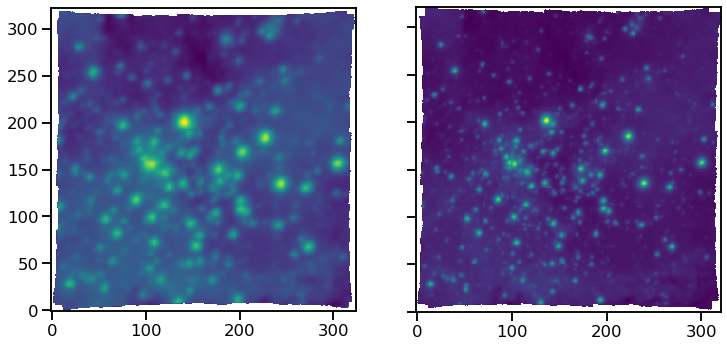

In [6]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
hacube1.sum(axis=0).plot(scale="log", ax=ax1)
hacube2.sum(axis=0).plot(scale="log", ax=ax2)

Clearly, the second one has much better seeing.

[(50.0, 150.0), (110.0, 210.0)]

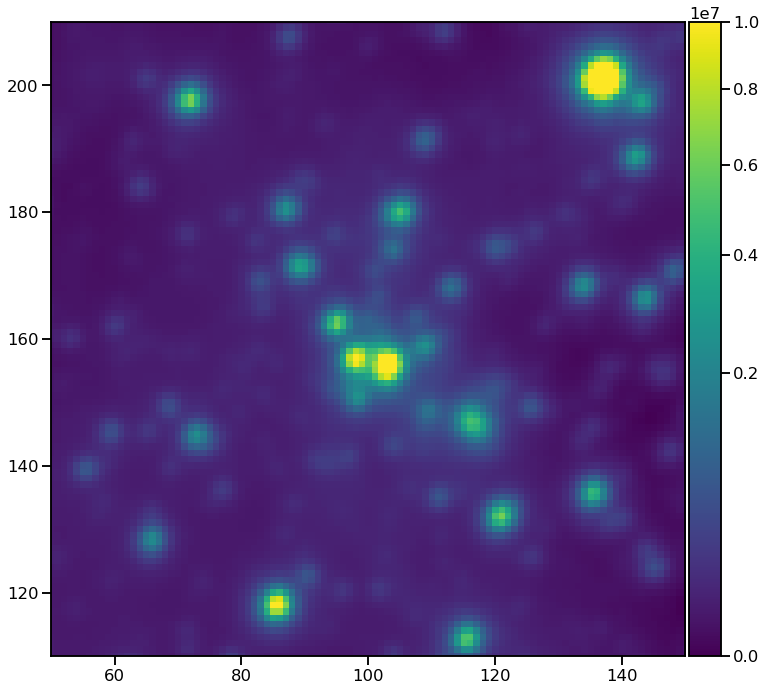

In [7]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(12, 12))
hacube2.sum(axis=0).plot(
    scale="sqrt",
    colorbar="v",
    vmax=1.0e7,
    vmin=0.0,
)
ax.set(
    xlim=[50, 150],
    ylim=[110, 210],
)

[None, (150000.0, 300000.0)]

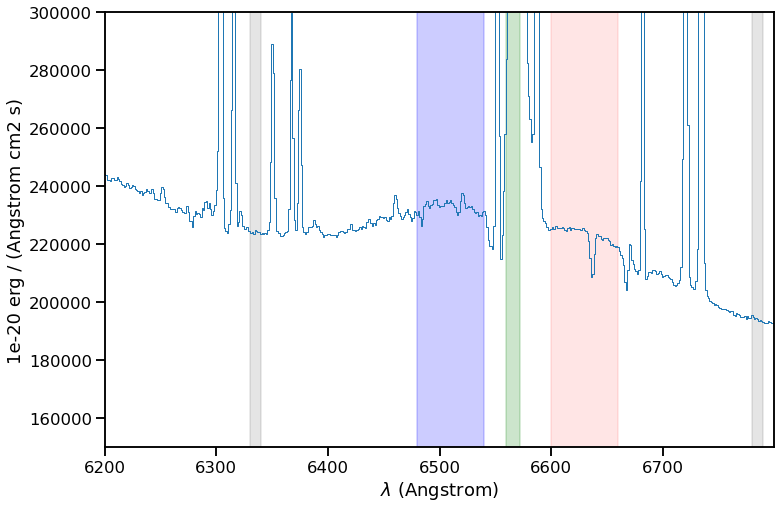

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hacube2[:, 140:155, 110:125].sum(axis=(1, 2)).plot()
# Continuum bands
ax.axvspan(6330, 6340, alpha=0.1, color="k")
ax.axvspan(6780, 6790, alpha=0.1, color="k")

# Raman bands
ax.axvspan(6480, 6540, alpha=0.2, color="b")
ax.axvspan(6600, 6660, alpha=0.1, color="r")

# Ha core
ax.axvspan(6560.0, 6572.0, alpha=0.2, color="g")


ax.set(
    yscale="linear",
    ylim=[1.5e5, 3e5],
)

In [9]:
cont_b = cube2.select_lambda(6330, 6340).mean(axis=0)
cont_r = cube2.select_lambda(6780, 6790).mean(axis=0)
cont = 0.5 * (cont_b + cont_r)

raman_b = (cube2.select_lambda(6480, 6540) - cont).mean(axis=0)
raman_r = (cube2.select_lambda(6600, 6660) - cont).mean(axis=0)

core_ha = (cube2.select_lambda(6560.0, 6572.0) - cont).sum(axis=0)

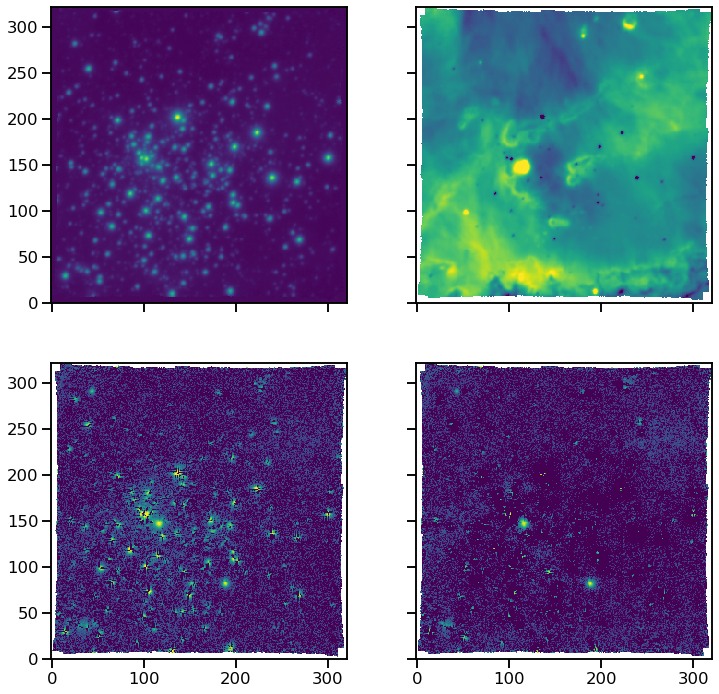

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 12))
cont.plot(
    scale="log",
    #    colorbar="v",
    ax=axes[0, 0],
)
core_ha.plot(
    scale="sqrt",
    vmin=-2e4,
    vmax=1e5,
    ax=axes[0, 1],
    #    colorbar="v",
)
raman_b.plot(
    scale="log",
    ax=axes[1, 0],
    vmin=0.0,
    vmax=1000.0,
    #    colorbar="v",
)
raman_r.plot(
    scale="log",
    ax=axes[1, 1],
    vmin=0.0,
    vmax=1000.0,
    #    colorbar="v",
)

[(50.0, 150.0), (110.0, 210.0)]

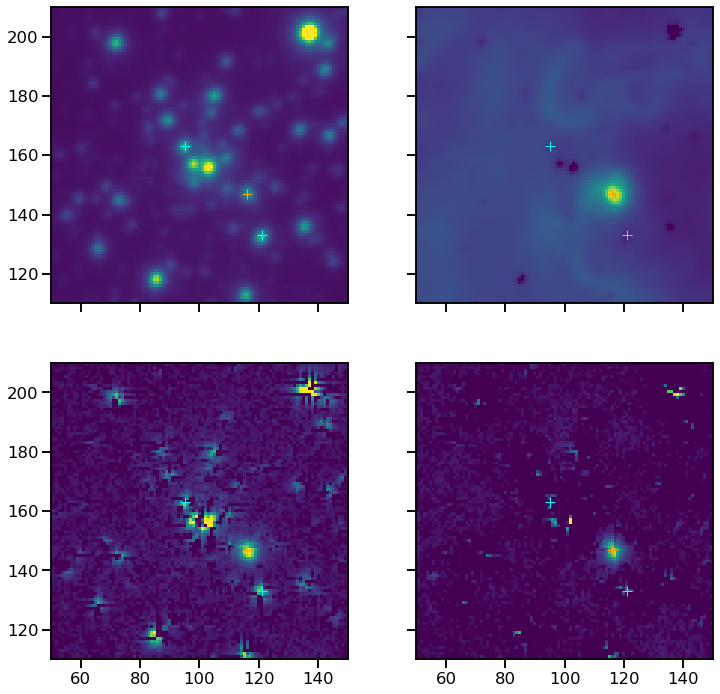

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 12))
cont.plot(
    scale="sqrt",
    #    colorbar="v",
    vmax=3e4,
    ax=axes[0, 0],
)
core_ha.plot(
    scale="sqrt",
    vmin=-2e4,
    vmax=10e5,
    ax=axes[0, 1],
    #    colorbar="v",
)
raman_b.plot(
    scale="sqrt",
    ax=axes[1, 0],
    vmin=0.0,
    vmax=1000.0,
    #    colorbar="v",
)
raman_r.plot(
    scale="sqrt",
    ax=axes[1, 1],
    vmin=0.0,
    vmax=1000.0,
    #    colorbar="v",
)

# Position of mYSO
x, y = 116, 147
# position of B0 star SSN 43
xb, yb = 95, 163
# position of B0 star SSN 40
xbb, ybb = 121, 133


for ax in axes.flat:
    ax.scatter(x, y, s=100, marker="+", color="orange", linewidth=1)
    ax.scatter(xb, yb, s=100, marker="+", color="cyan", linewidth=1)
    ax.scatter(xbb, ybb, s=100, marker="+", color="cyan", linewidth=1)


axes[0, 0].set(
    xlim=[50, 150],
    ylim=[110, 210],
)

In [12]:
m = 3
spec_ne = cube2[:, y : y + m, x - m : x].mean(axis=(1, 2))
spec_nw = cube2[:, y : y + m, x : x + m].mean(axis=(1, 2))
spec_se = cube2[:, y - m : y, x - m : x].mean(axis=(1, 2))
spec_sw = cube2[:, y - m : y, x : x + m].mean(axis=(1, 2))

spec_out = (
    cube2[:, y - 2 * m : y + 2 * m, x - 2 * m : x + 2 * m].sum(axis=(1, 2))
    - m ** 2 * (spec_ne + spec_nw + spec_se + spec_sw)
) / (16 * m ** 2 - 4 * m ** 2)

spec_avsub = 0.25 * (spec_ne + spec_nw + spec_se + spec_sw) - spec_out

spec_b_ne = cube2[:, yb : yb + m, xb - m : xb].mean(axis=(1, 2))
spec_b_nw = cube2[:, yb : yb + m, xb : xb + m].mean(axis=(1, 2))
spec_b_se = cube2[:, yb - m : yb, xb - m : xb].mean(axis=(1, 2))
spec_b_sw = cube2[:, yb - m : yb, xb : xb + m].mean(axis=(1, 2))

spec_b_out = (
    cube2[:, yb - 2 * m : yb + 2 * m, xb - 2 * m : xb + 2 * m].sum(axis=(1, 2))
    - m ** 2 * (spec_b_ne + spec_b_nw + spec_b_se + spec_b_sw)
) / (16 * m ** 2 - 4 * m ** 2)

spec_b_avsub = 0.25 * (spec_b_ne + spec_b_nw + spec_b_se + spec_b_sw) - spec_b_out

spec_bb_ne = cube2[:, ybb : ybb + m, xbb - m : xbb].mean(axis=(1, 2))
spec_bb_nw = cube2[:, ybb : ybb + m, xbb : xbb + m].mean(axis=(1, 2))
spec_bb_se = cube2[:, ybb - m : ybb, xbb - m : xbb].mean(axis=(1, 2))
spec_bb_sw = cube2[:, ybb - m : ybb, xbb : xbb + m].mean(axis=(1, 2))

spec_bb_out = (
    cube2[:, ybb - 2 * m : ybb + 2 * m, xbb - 2 * m : xbb + 2 * m].sum(axis=(1, 2))
    - m ** 2 * (spec_bb_ne + spec_bb_nw + spec_bb_se + spec_bb_sw)
) / (16 * m ** 2 - 4 * m ** 2)

spec_bb_avsub = 0.25 * (spec_bb_ne + spec_bb_nw + spec_bb_se + spec_bb_sw) - spec_bb_out

Plot these regions on the image top make sure they are OK.



In [13]:
import regions

In [14]:
boxes = {
    "SSN 152+168": regions.BoundingBox(
        iymin=y - m,
        iymax=y + m,
        ixmin=x - m,
        ixmax=x + m,
    ),
    "BG 152+168": regions.BoundingBox(
        iymin=y - 2 * m,
        iymax=y + 2 * m,
        ixmin=x - 2 * m,
        ixmax=x + 2 * m,
    ),
    "SSN 43": regions.BoundingBox(
        iymin=yb - m,
        iymax=yb + m,
        ixmin=xb - m,
        ixmax=xb + m,
    ),
    "BG 43": regions.BoundingBox(
        iymin=yb - 2 * m,
        iymax=yb + 2 * m,
        ixmin=xb - 2 * m,
        ixmax=xb + 2 * m,
    ),
    "SSN 40": regions.BoundingBox(
        iymin=ybb - m,
        iymax=ybb + m,
        ixmin=xbb - m,
        ixmax=xbb + m,
    ),
    "BG 40": regions.BoundingBox(
        iymin=ybb - 2 * m,
        iymax=ybb + 2 * m,
        ixmin=xbb - 2 * m,
        ixmax=xbb + 2 * m,
    ),
}

[(50.0, 150.0), (110.0, 210.0)]

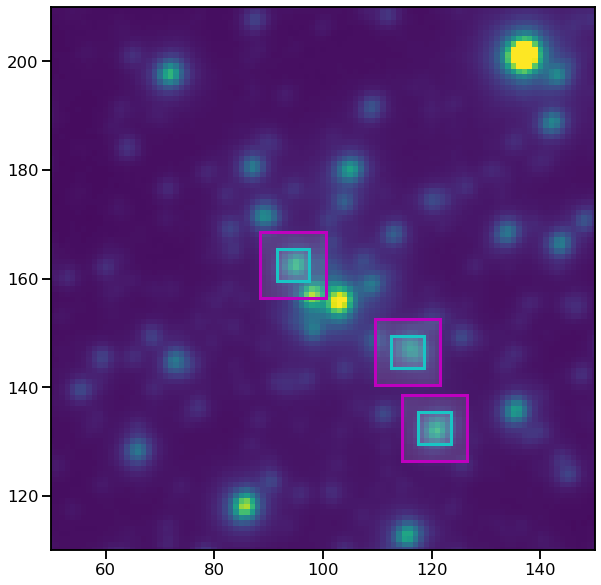

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

cont.plot(
    scale="sqrt",
    vmax=3e4,
    ax=ax,
)
for box, c in zip(boxes.values(), "cmcmcm"):
    box.plot(
        ax=ax,
        lw=3,
        edgecolor=c,
        linestyle="solid",
        facecolor=(1.0, 1.0, 1.0, 0.1),
        fill=True,
    )
ax.set(
    xlim=[50, 150],
    ylim=[110, 210],
)

[(50.0, 150.0), (110.0, 210.0)]

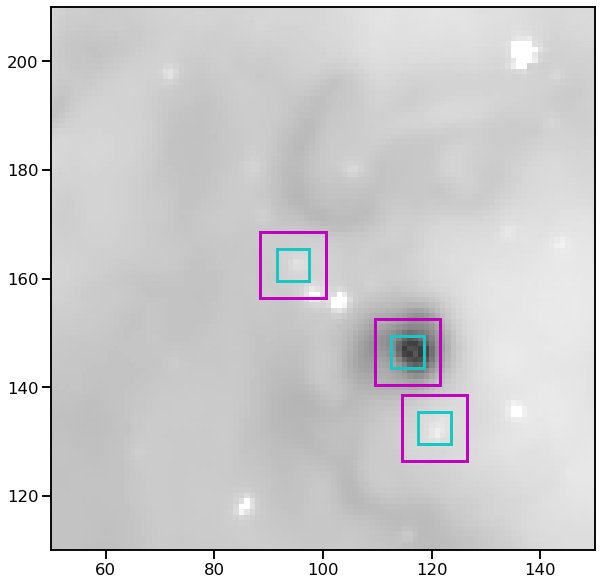

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

core_ha.plot(
    scale="sqrt",
    vmin=-2e4,
    vmax=10e5,
    cmap="gray_r",
    ax=ax,
)
for box, c in zip(boxes.values(), "cmcmcm"):
    box.plot(
        ax=ax,
        lw=3,
        edgecolor=c,
        linestyle="solid",
        facecolor=(1.0, 1.0, 1.0, 0.1),
        fill=True,
    )
ax.set(
    xlim=[50, 150],
    ylim=[110, 210],
)

### Full wavelength range of the spectrum

[None, (300, 20000.0)]

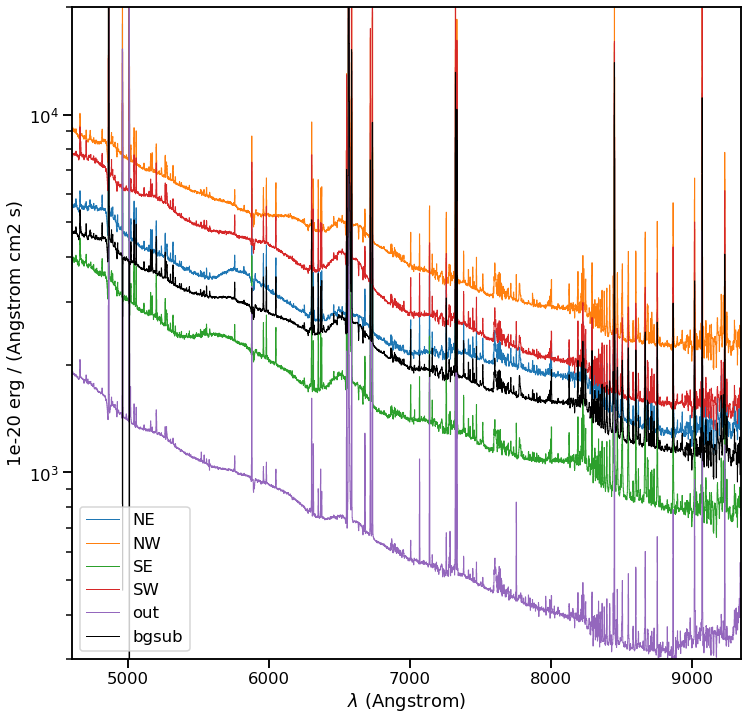

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
spec_out.plot(label="out")
spec_avsub.plot(c="k", label="bgsub")

ax.legend()
ax.set(
    yscale="log",
    ylim=[300, 2e4],
)

[None, (0.0, 2.0)]

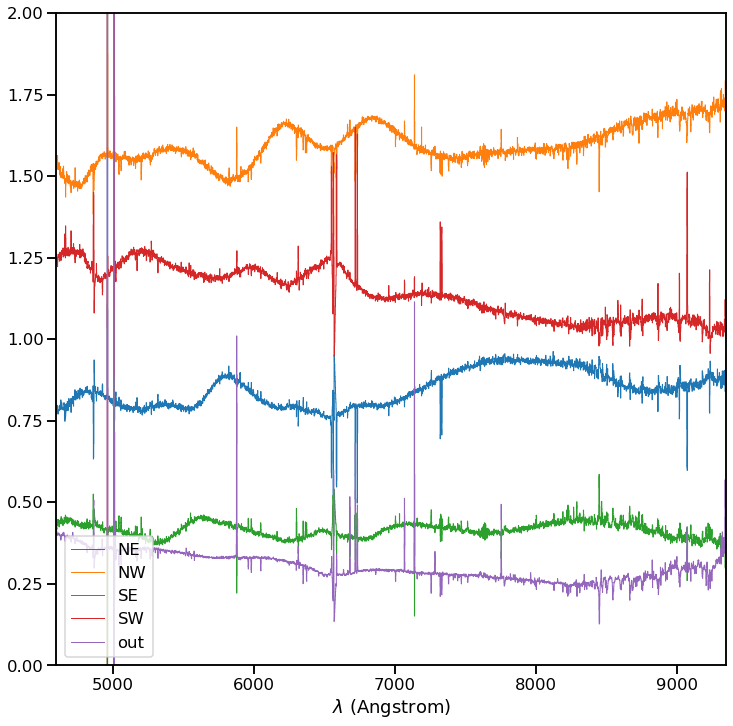

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
((spec_ne - spec_out) / spec_avsub).plot(label="NE")
((spec_nw - spec_out) / spec_avsub).plot(label="NW")
((spec_se - spec_out) / spec_avsub).plot(label="SE")
((spec_sw - spec_out) / spec_avsub).plot(label="SW")
(spec_out / spec_avsub).plot(label="out")

ax.legend(loc="lower left")
ax.set(
    yscale="linear",
    ylim=[0, 2],
)

The SW sample has clearly got the most raman. **Now I am not sure that this is not just due to the wavy centroiding residuals**

But what are the strange bumps at around 5900 Å?

[None, (300, 20000.0)]

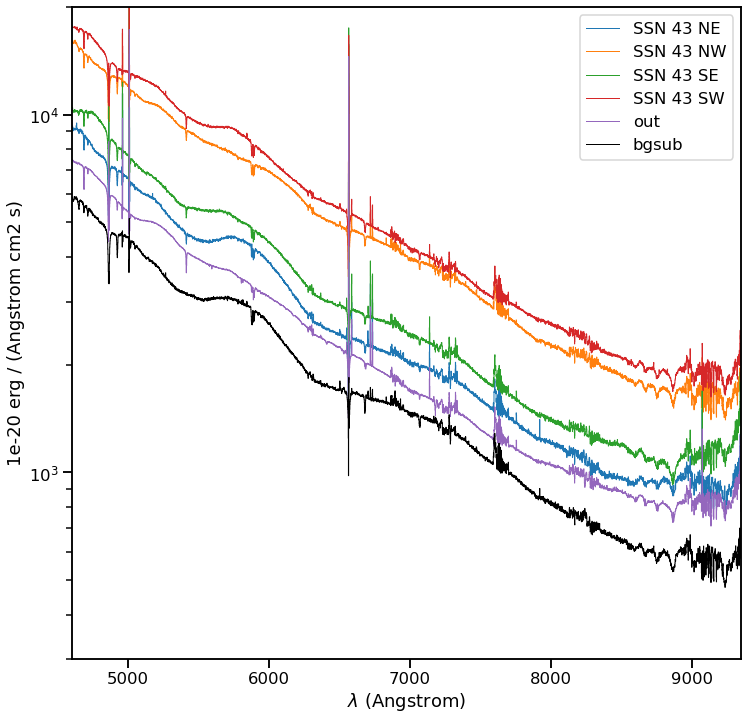

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_b_ne.plot(label="SSN 43 NE")
spec_b_nw.plot(label="SSN 43 NW")
spec_b_se.plot(label="SSN 43 SE")
spec_b_sw.plot(label="SSN 43 SW")
spec_b_out.plot(label="out")
spec_b_avsub.plot(c="k", label="bgsub")
ax.legend()
ax.set(
    yscale="log",
    ylim=[300, 2e4],
)

[None, (0.0, 2.0)]

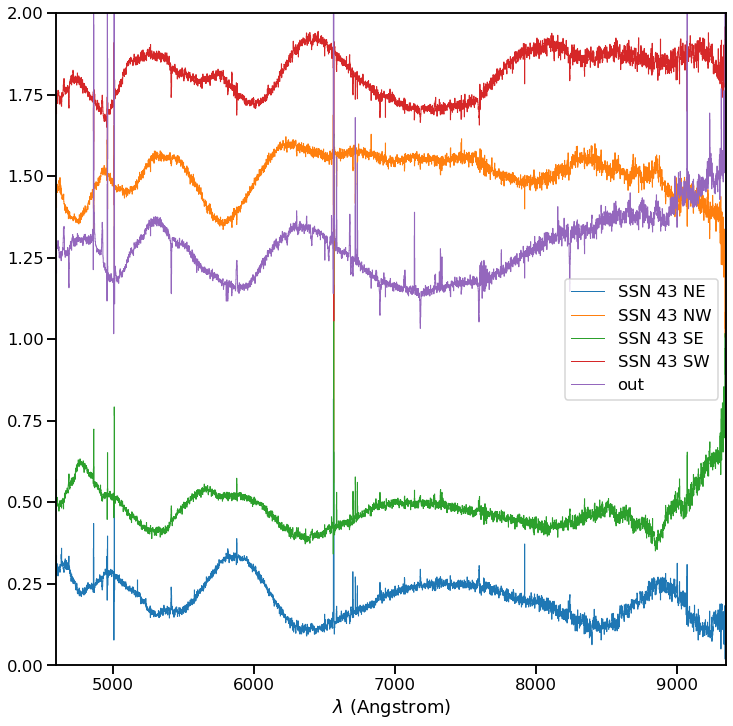

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))

((spec_b_ne - spec_b_out) / spec_b_avsub).plot(label="SSN 43 NE")
((spec_b_nw - spec_b_out) / spec_b_avsub).plot(label="SSN 43 NW")
((spec_b_se - spec_b_out) / spec_b_avsub).plot(label="SSN 43 SE")
((spec_b_sw - spec_b_out) / spec_b_avsub).plot(label="SSN 43 SW")
(spec_b_out / spec_b_avsub).plot(label="out")

ax.legend()
ax.set(
    yscale="linear",
    ylim=[0, 2],
)

[None, (300, 20000.0)]

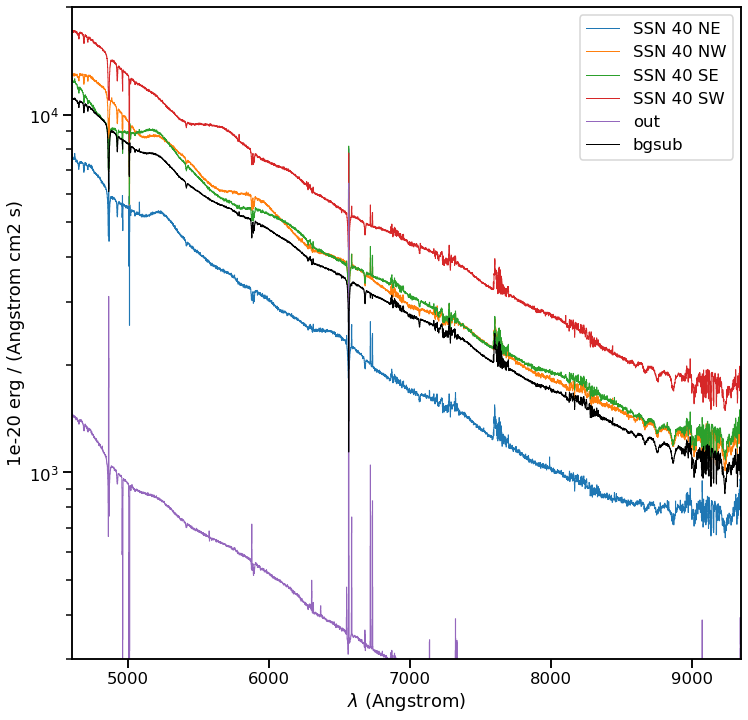

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_bb_ne.plot(label="SSN 40 NE")
spec_bb_nw.plot(label="SSN 40 NW")
spec_bb_se.plot(label="SSN 40 SE")
spec_bb_sw.plot(label="SSN 40 SW")
spec_bb_out.plot(label="out")
spec_bb_avsub.plot(c="k", label="bgsub")
ax.legend()
ax.set(
    yscale="log",
    ylim=[300, 2e4],
)

[None, (0.0, 2.0)]

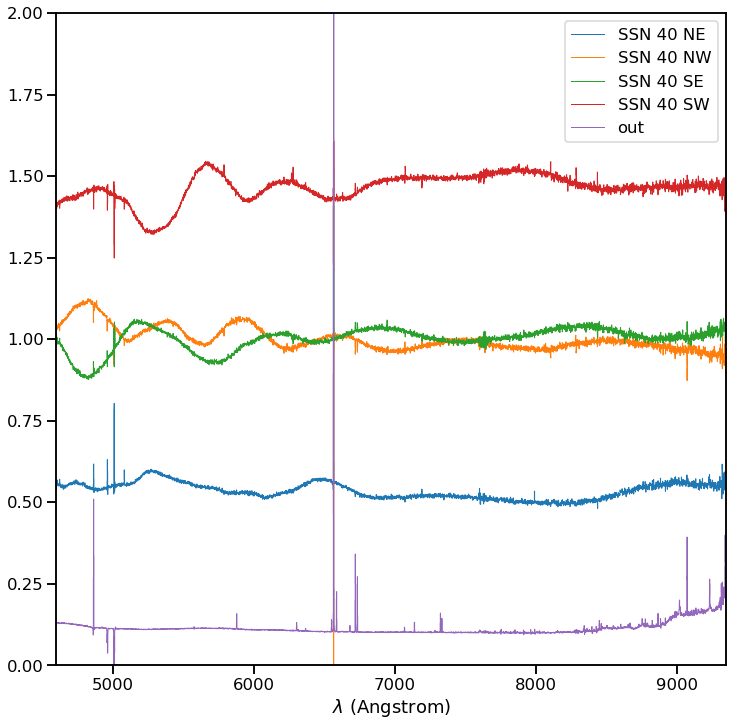

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))

((spec_bb_ne - spec_bb_out) / spec_bb_avsub).plot(label="SSN 40 NE")
((spec_bb_nw - spec_bb_out) / spec_bb_avsub).plot(label="SSN 40 NW")
((spec_bb_se - spec_bb_out) / spec_bb_avsub).plot(label="SSN 40 SE")
((spec_bb_sw - spec_bb_out) / spec_bb_avsub).plot(label="SSN 40 SW")
(spec_bb_out / spec_bb_avsub).plot(label="out")

ax.legend()
ax.set(
    yscale="linear",
    ylim=[0, 2],
)

If we look at the B-star spectra (SSN 43 and SSN 40) then they also shows bumps around 5900 Å in some spectra.  *These must be instrumental artefacts*


#### A solution to the wavy bumps?

These are probably related to inaccuracy in the refraction correction.  They look similar to Fig. 2 of Weilbacher:2015a, which shows centroiding residuals versus wavelength.

#### Compare average spectrum of the different stars


In [23]:
spec_all = cube2.mean(axis=(1, 2))

[None, (300, 20000.0)]

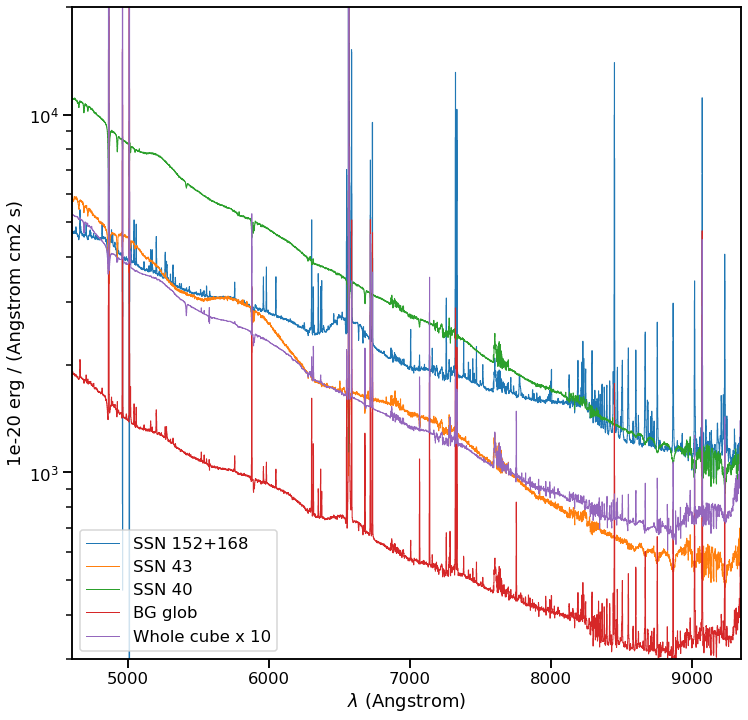

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_avsub.plot(label="SSN 152+168")
spec_b_avsub.plot(label="SSN 43")
spec_bb_avsub.plot(label="SSN 40")
spec_out.plot(label="BG glob")
(10 * spec_all).plot(label="Whole cube x 10")


ax.legend()
ax.set(
    yscale="log",
    ylim=[300, 2e4],
)

### Zoom in on the region around Hα

[(6000.0, 7000.0), None, (0.0, 8000.0)]

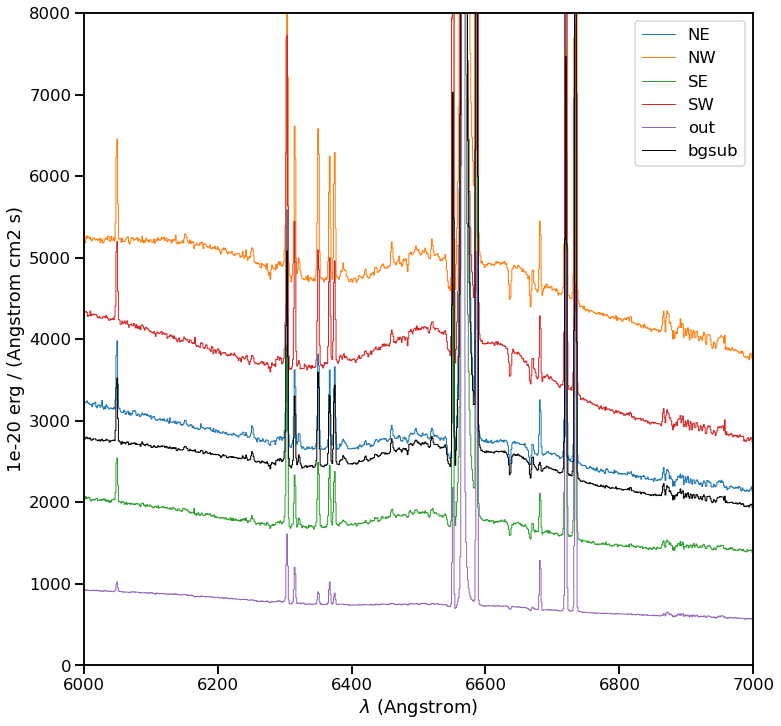

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
spec_out.plot(label="out")
spec_avsub.plot(c="k", label="bgsub")

ax.legend()
ax.set(
    xlim=[6000, 7000],
    yscale="linear",
    ylim=[0, 8000],
)

[(6000.0, 7000.0), None, (0.0, 2.0)]

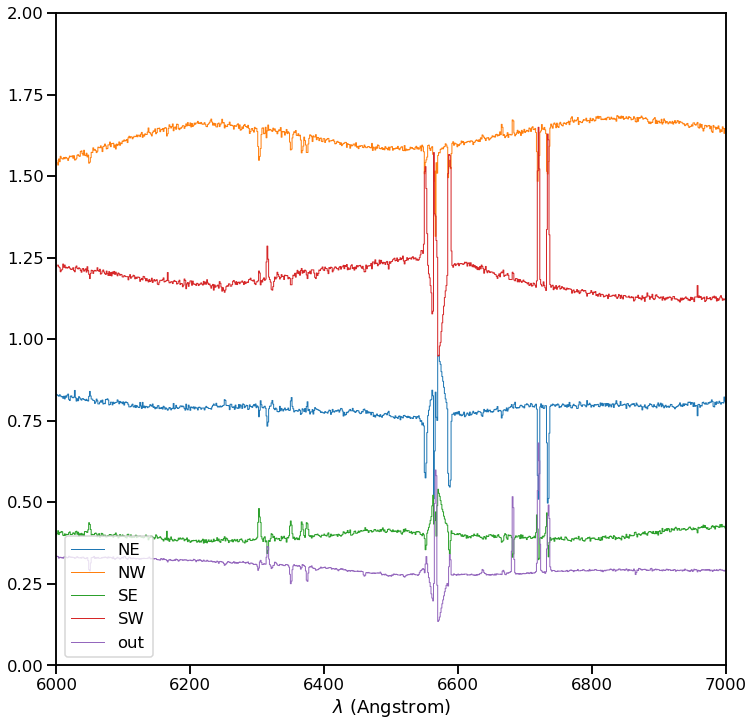

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
((spec_ne - spec_out) / spec_avsub).plot(label="NE")
((spec_nw - spec_out) / spec_avsub).plot(label="NW")
((spec_se - spec_out) / spec_avsub).plot(label="SE")
((spec_sw - spec_out) / spec_avsub).plot(label="SW")
(spec_out / spec_avsub).plot(label="out")

ax.legend(loc="lower left")
ax.set(
    xlim=[6000, 7000],
    yscale="linear",
    ylim=[0, 2],
)

So the green and blue lines (NE and SE) show the triangular intermediate wings more.

[(6180.0, 6850.0), None, (0.0, 5000.0)]

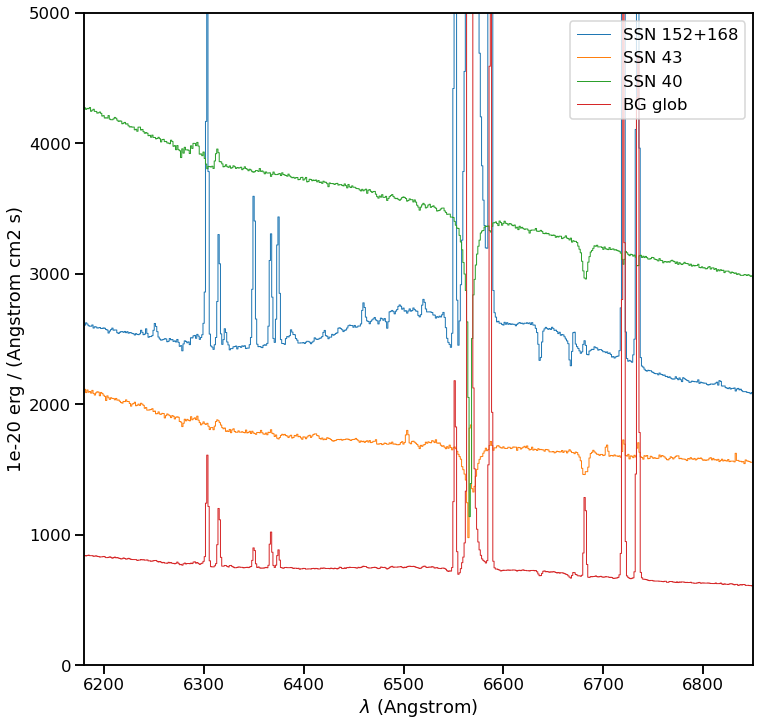

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_avsub.plot(label="SSN 152+168")
spec_b_avsub.plot(label="SSN 43")
spec_bb_avsub.plot(label="SSN 40")
spec_out.plot(label="BG glob")

ax.legend()
ax.set(
    xlim=[6180, 6850],
    yscale="linear",
    ylim=[0, 5000],
)

[(6500.0, 6650.0), None, (487.45569803213306, 355847.05132716516)]

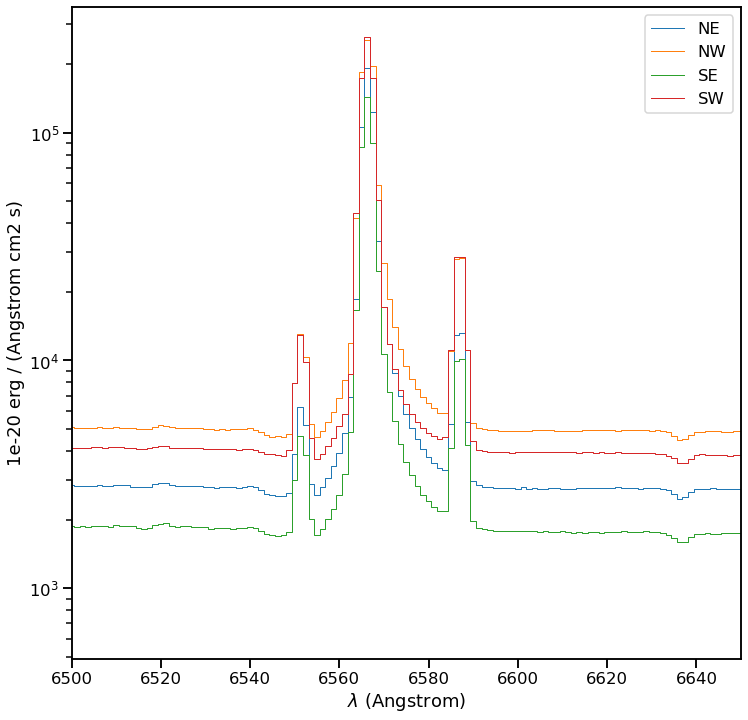

In [28]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
ax.legend()
ax.set(
    xlim=[6500, 6650],
    yscale="log",
    ylim=[None, None],
)

[(6500.0, 6650.0), None, (0.0, 2.0)]

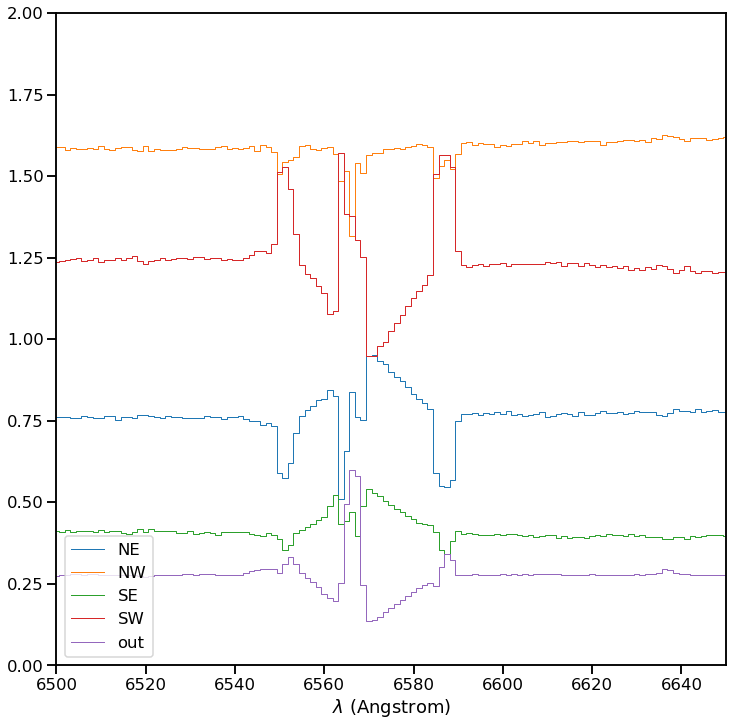

In [29]:
fig, ax = plt.subplots(figsize=(12, 12))
((spec_ne - spec_out) / spec_avsub).plot(label="NE")
((spec_nw - spec_out) / spec_avsub).plot(label="NW")
((spec_se - spec_out) / spec_avsub).plot(label="SE")
((spec_sw - spec_out) / spec_avsub).plot(label="SW")
(spec_out / spec_avsub).plot(label="out")

ax.legend(loc="lower left")
ax.set(
    xlim=[6500, 6650],
    yscale="linear",
    ylim=[0, 2],
)

[(6500.0, 6650.0), None, (207.26737346662807, 181584.45999392078)]

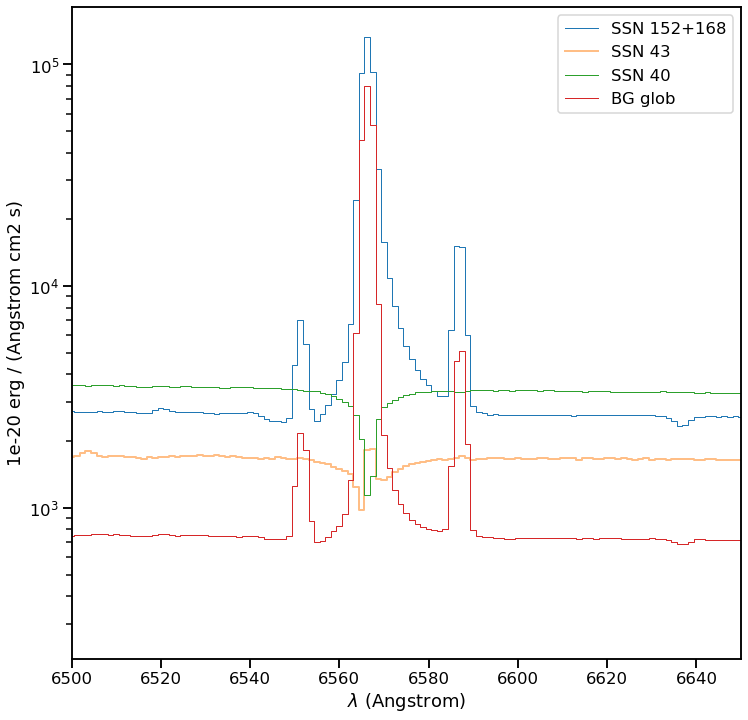

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_avsub.plot(label="SSN 152+168")
spec_b_avsub.plot(label="SSN 43", alpha=0.5, linewidth=2)
spec_bb_avsub.plot(label="SSN 40")
spec_out.plot(label="BG glob")

ax.legend()
ax.set(
    xlim=[6500, 6650],
    yscale="log",
    ylim=[None, None],
)

[(4600.0, 5500.0), None, (0.0, 15000.0)]

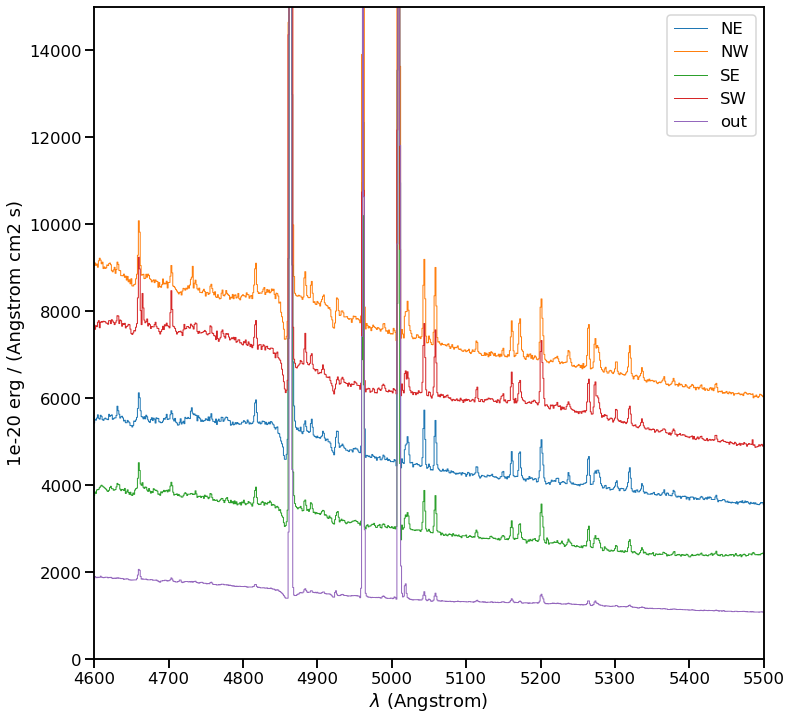

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
spec_out.plot(label="out")
ax.legend()
ax.set(
    xlim=[4600, 5500],
    yscale="linear",
    ylim=[0, 15000],
)

[(4600.0, 5500.0), None, (0.0, 30000.0)]

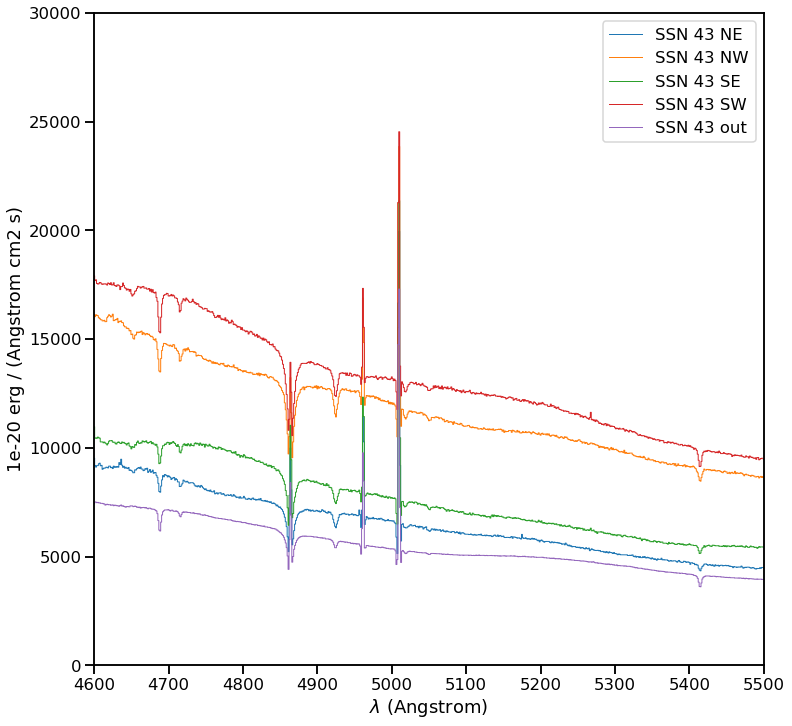

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_b_ne.plot(label="SSN 43 NE")
spec_b_nw.plot(label="SSN 43 NW")
spec_b_se.plot(label="SSN 43 SE")
spec_b_sw.plot(label="SSN 43 SW")
spec_b_out.plot(label="SSN 43 out")
ax.legend()
ax.set(
    xlim=[4600, 5500],
    yscale="linear",
    ylim=[0, 30000],
)

[(4600.0, 5500.0), None, (0.0, 30000.0)]

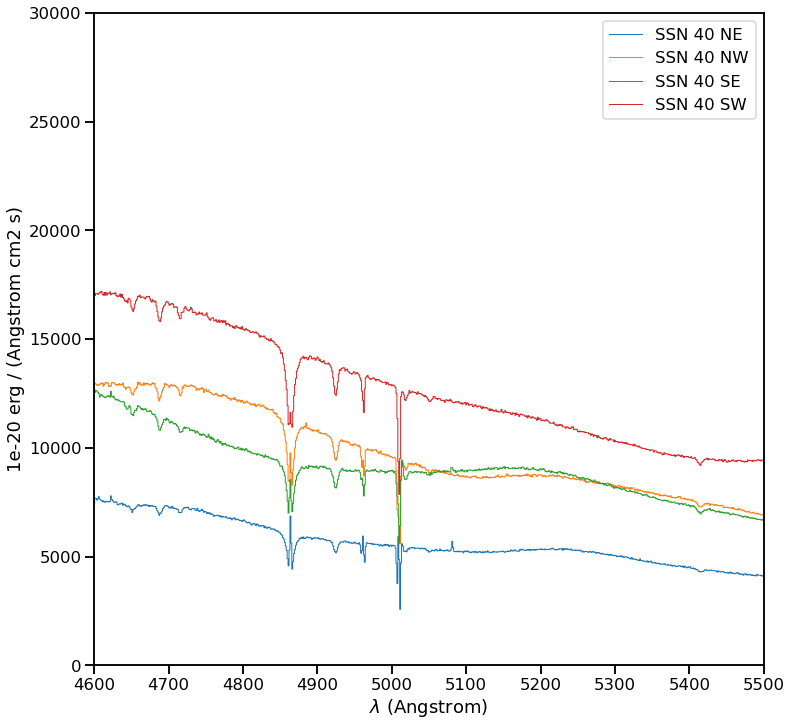

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_bb_ne.plot(label="SSN 40 NE")
spec_bb_nw.plot(label="SSN 40 NW")
spec_bb_se.plot(label="SSN 40 SE")
spec_bb_sw.plot(label="SSN 40 SW")
ax.legend()
ax.set(
    xlim=[4600, 5500],
    yscale="linear",
    ylim=[0, 30000],
)

[(4600.0, 5500.0), None, (0.0, 12000.0)]

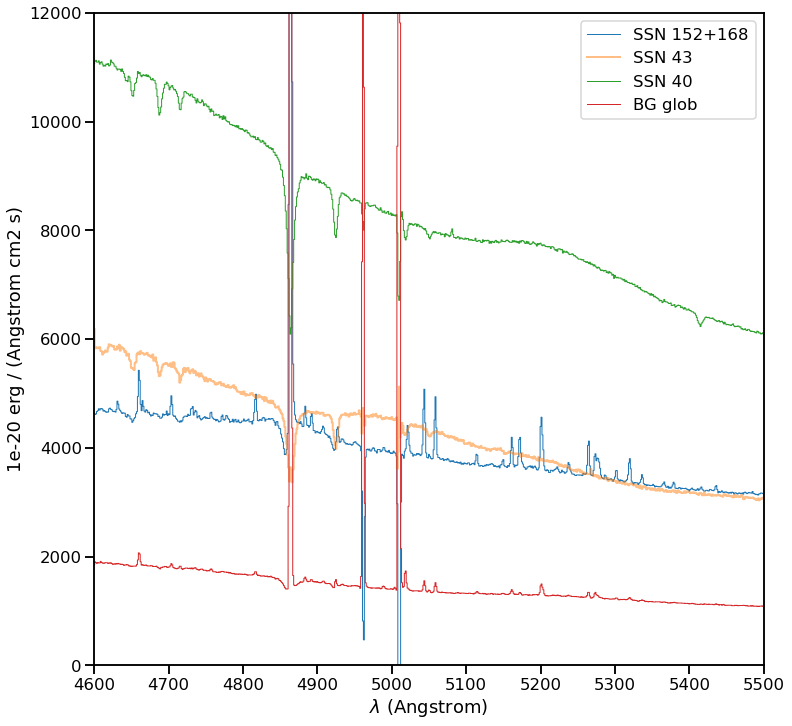

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_avsub.plot(label="SSN 152+168")
spec_b_avsub.plot(label="SSN 43", alpha=0.5, linewidth=2)
spec_bb_avsub.plot(label="SSN 40")
spec_out.plot(label="BG glob")

ax.legend()
ax.set(
    xlim=[4600, 5500],
    yscale="linear",
    ylim=[0, 12000],
)

## Normalize by the full-cube spectrum

This is away to show the Raman wings nicely.  And it also cures the problem with the telluric over-correction.

[None]

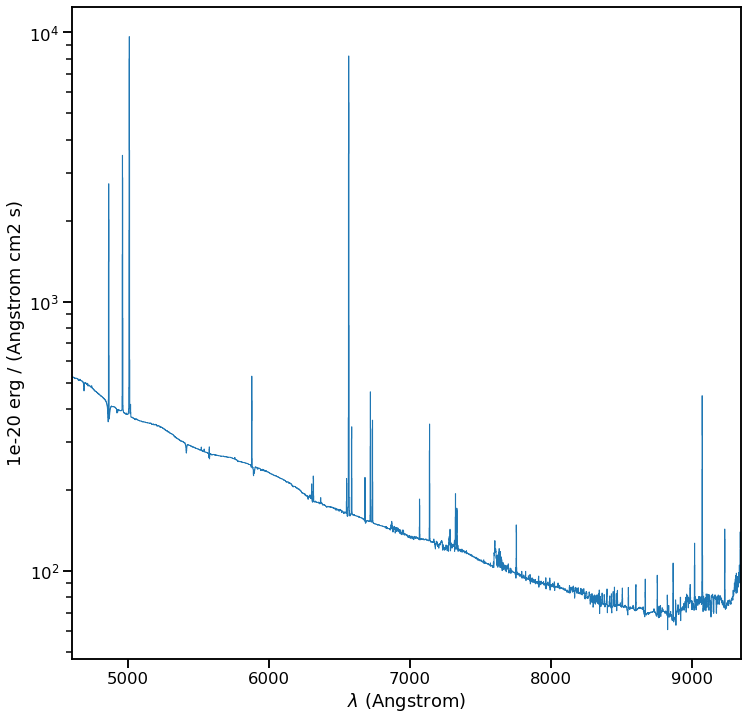

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_all.plot()
ax.set(
    yscale="log",
    # ylim=[6e6, 6e7],
)

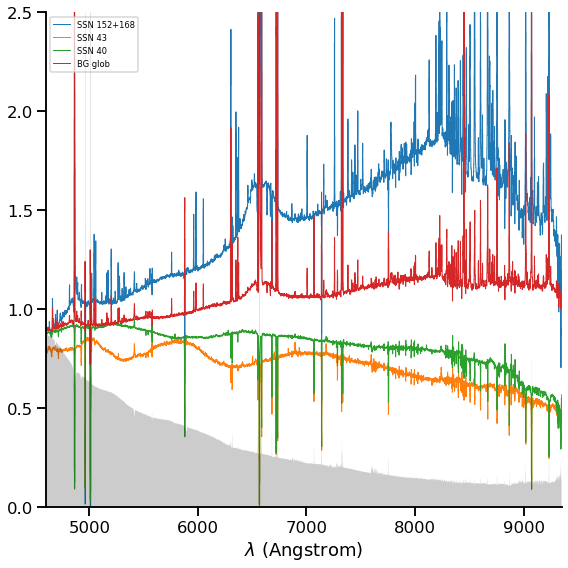

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
(spec_avsub / 10 / spec_all).plot(label="SSN 152+168")
(spec_b_avsub / 14 / spec_all).plot(label="SSN 43")
(spec_bb_avsub / 24 / spec_all).plot(label="SSN 40")
(spec_out / 4 / spec_all).plot(label="BG glob")

ax.fill_between(
    spec_all.wave.coord(),
    spec_all.data / 600,
    color="k",
    step="mid",
    alpha=0.2,
    linewidth=0,
    zorder=100,
)

# (spec_all / 300).plot(
#    label="_nolabel",
#    color="k",
#    alpha=0.2,
#    linewidth=2,
# )

ax.legend(fontsize="small")
ax.set(
    yscale="linear",
    ylim=[0, 2.5],
)
sns.despine()
fig.tight_layout()
fig.savefig(figpath / "ngc346-compact-sources-ratio-spectrum.pdf")

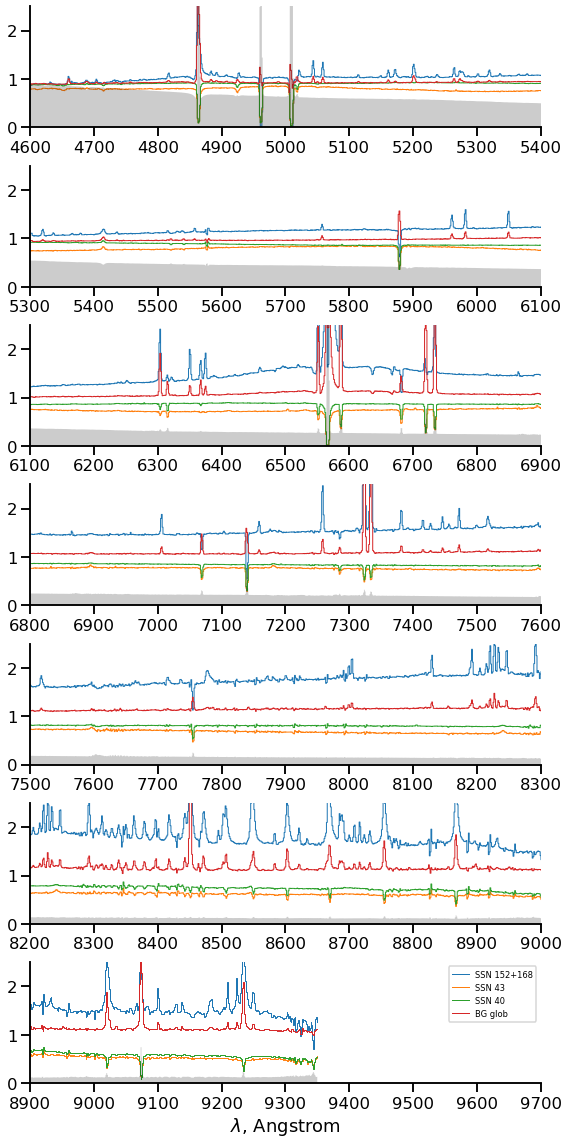

In [37]:
lamranges = [
    [4600, 5400],
    [5300, 6100],
    [6100, 6900],
    [6800, 7600],
    [7500, 8300],
    [8200, 9000],
    [8900, 9700],
]
nlam = len(lamranges)

fig, axes = plt.subplots(nlam, 1, figsize=(8, 16))
for lamrange, ax in zip(lamranges, axes):
    (spec_avsub / 10 / spec_all).plot(ax=ax, label="SSN 152+168")
    (spec_b_avsub / 14 / spec_all).plot(ax=ax, label="SSN 43")
    (spec_bb_avsub / 24 / spec_all).plot(ax=ax, label="SSN 40")
    (spec_out / 4 / spec_all).plot(ax=ax, label="BG glob")
    ax.fill_between(
        spec_all.wave.coord(),
        spec_all.data / 600,
        color="k",
        step="mid",
        alpha=0.2,
        linewidth=0,
        zorder=100,
    )
    ax.set(
        yscale="linear",
        ylim=[0, 2.5],
        xlim=lamrange,
        xlabel="",
        ylabel="",
    )


axes[-1].legend(fontsize="small")
axes[-1].set(
    xlabel="$\lambda$, Angstrom",
)
sns.despine()
fig.tight_layout()
fig.savefig(figpath / "ngc346-compact-sources-ratio-spectrum-multipanel.pdf")

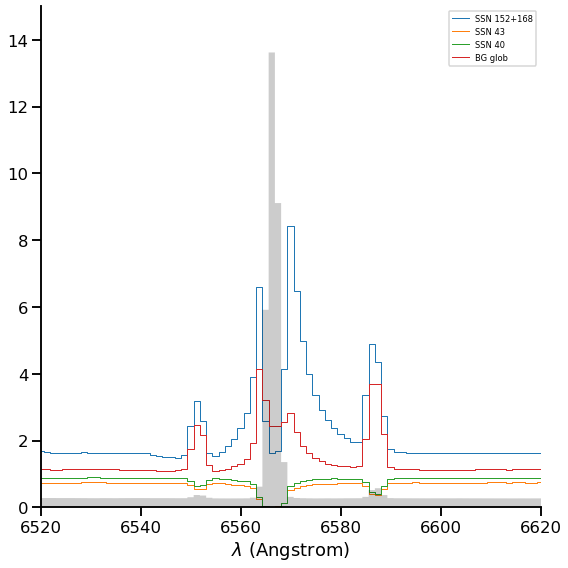

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
(spec_avsub / 10 / spec_all).plot(label="SSN 152+168")
(spec_b_avsub / 14 / spec_all).plot(label="SSN 43")
(spec_bb_avsub / 24 / spec_all).plot(label="SSN 40")
(spec_out / 4 / spec_all).plot(label="BG glob")

ax.fill_between(
    spec_all.wave.coord(),
    spec_all.data / 600,
    color="k",
    step="mid",
    alpha=0.2,
    linewidth=0,
    zorder=100,
)

# (spec_all / 300).plot(
#    label="_nolabel",
#    color="k",
#    alpha=0.2,
#    linewidth=2,
# )

ax.legend(fontsize="small")
ax.set(
    xlim=[6520, 6620],
    yscale="linear",
    ylim=[0, 15],
)
sns.despine()
fig.tight_layout()
fig.savefig(figpath / "ngc346-compact-sources-ratio-ha-zoom.pdf")

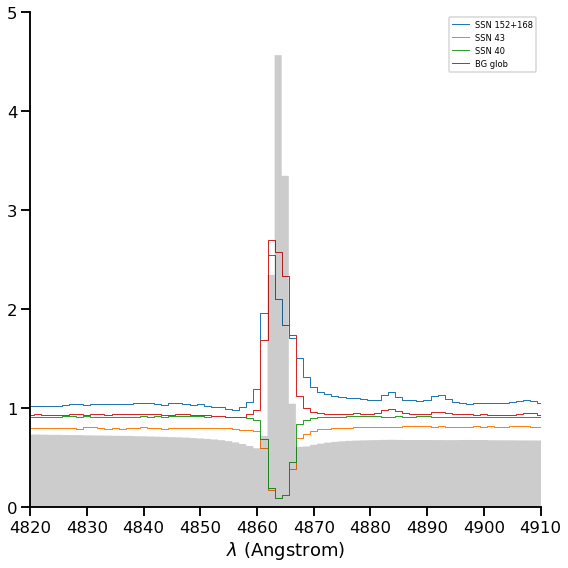

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
(spec_avsub / 10 / spec_all).plot(label="SSN 152+168")
(spec_b_avsub / 14 / spec_all).plot(label="SSN 43")
(spec_bb_avsub / 24 / spec_all).plot(label="SSN 40")
(spec_out / 4 / spec_all).plot(label="BG glob")

ax.fill_between(
    spec_all.wave.coord(),
    spec_all.data / 600,
    color="k",
    step="mid",
    alpha=0.2,
    linewidth=0,
    zorder=100,
)

# (spec_all / 300).plot(
#    label="_nolabel",
#    color="k",
#    alpha=0.2,
#    linewidth=2,
# )

ax.legend(fontsize="small")
ax.set(
    xlim=[4820, 4910],
    yscale="linear",
    ylim=[0, 5],
)
sns.despine()
fig.tight_layout()
fig.savefig(figpath / "ngc346-compact-sources-ratio-hb-zoom.pdf")

## Look at some interesting lines

The O I, [O I], [O II], [O III] lines


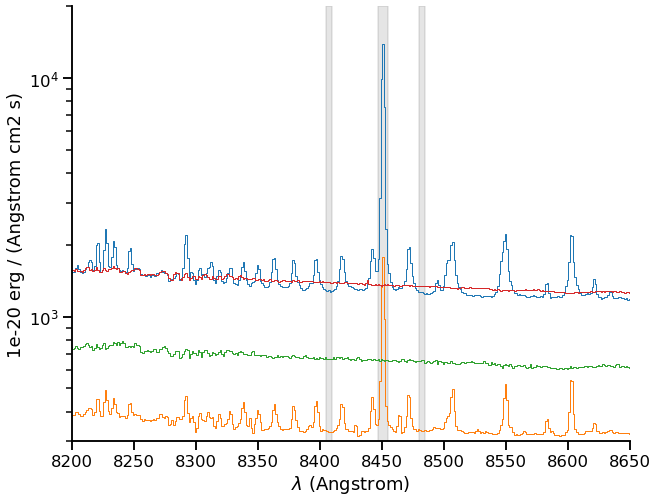

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
spec_avsub.plot()
spec_out.plot()
spec_b_avsub.plot()
spec_bb_avsub.plot()


ax.axvspan(8447, 8455, color="k", alpha=0.1)

ax.axvspan(8405, 8410, color="k", alpha=0.1)
ax.axvspan(8480, 8485, color="k", alpha=0.1)

ax.set(
    xlim=[8200, 8650],
    ylim=[300, 2e4],
    yscale="log",
)
sns.despine()

In [41]:
r1, r2 = 8480, 8485
b1, b2 = 8405, 8410
w1, w2 = 8447, 8455

bg_b = cube2.select_lambda(b1, b2).mean(axis=0)
bg_r = cube2.select_lambda(r1, r2).mean(axis=0)
bg_8446 = 0.5 * (bg_b + bg_r)
wide_8446 = cube2.select_lambda(b1, r2) - bg_8446


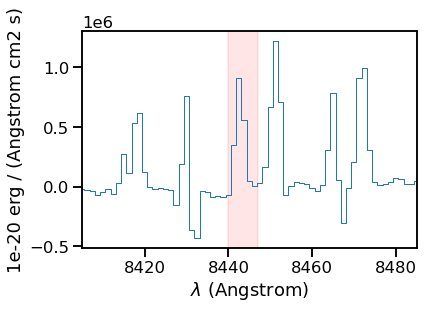

In [42]:
h1, h2 = 8440, 8447
fig, ax = plt.subplots()
wide_8446.sum(axis=(1, 2)).plot()
ax.axvspan(h1, h2, color="r", alpha=0.1)

In [43]:
sum8446 = wide_8446.select_lambda(w1, w2).sum(axis=0)
sum8438 = wide_8446.select_lambda(h1, h2).sum(axis=0)

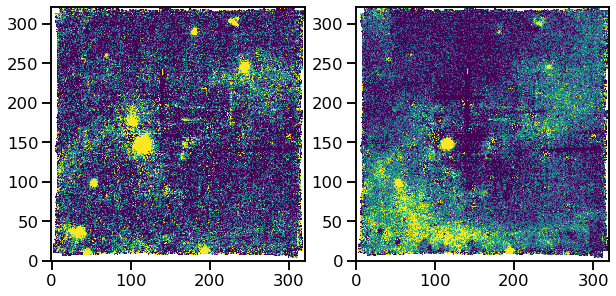

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sum8446.plot(ax=axes[0], vmin=-10, vmax=100)
sum8438.plot(ax=axes[1], vmin=-10, vmax=100)

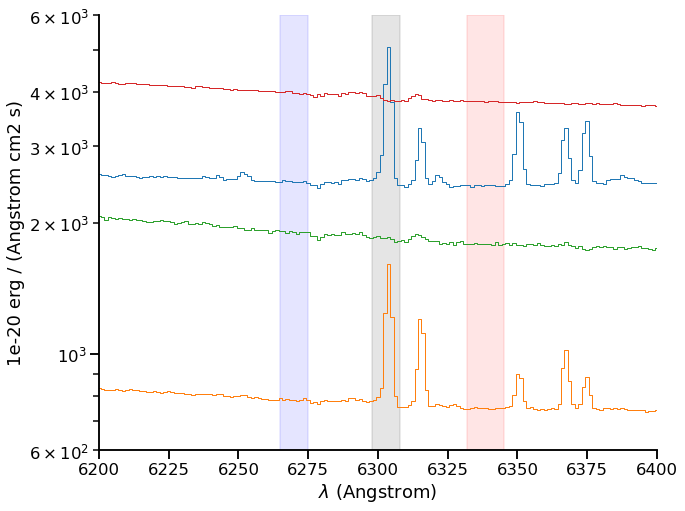

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
spec_avsub.plot()
spec_out.plot()
spec_b_avsub.plot()
spec_bb_avsub.plot()

b1, b2 = 6265, 6275
r1, r2 = 6332, 6345
w1, w2 = 6298, 6308

ax.axvspan(w1, w2, color="k", alpha=0.1)

ax.axvspan(b1, b2, color="b", alpha=0.1)
ax.axvspan(r1, r2, color="r", alpha=0.1)

ax.set(
    xlim=[6200, 6400],
    ylim=[600, 6e3],
    yscale="log",
)
sns.despine()

In [46]:
bg_b = cube2.select_lambda(b1, b2).mean(axis=0)
bg_r = cube2.select_lambda(r1, r2).mean(axis=0)
bg_6300 = 0.5 * (bg_b + bg_r)
wide_6300 = cube2.select_lambda(b1, r2) - bg_6300

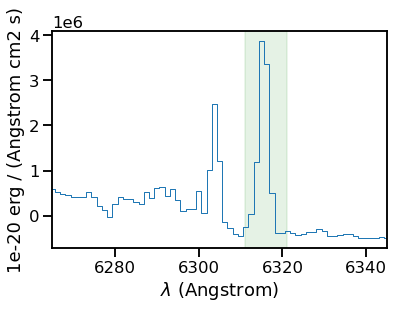

In [47]:
s1, s2 = 6311, 6321
fig, ax = plt.subplots()
wide_6300.sum(axis=(1, 2)).plot()
ax.axvspan(s1, s2, color="g", alpha=0.1)

In [48]:
sum6300 = wide_6300.select_lambda(w1, w2).sum(axis=0)
sum6312 = wide_6300.select_lambda(s1, s2).sum(axis=0)

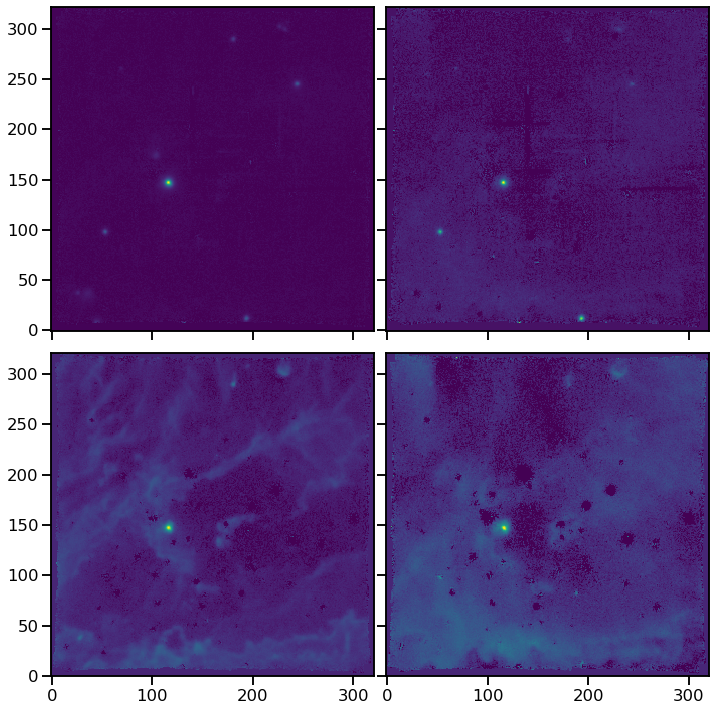

In [49]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

(10 + sum8446).plot(ax=axes[0, 0], vmin=0, scale="sqrt")
(20 + sum8438).plot(ax=axes[0, 1], vmin=0, scale="sqrt")
(200 + sum6300).plot(ax=axes[1, 0], vmin=0, scale="sqrt")
(75 + sum6312).plot(ax=axes[1, 1], vmin=0, scale="sqrt")
fig.tight_layout()

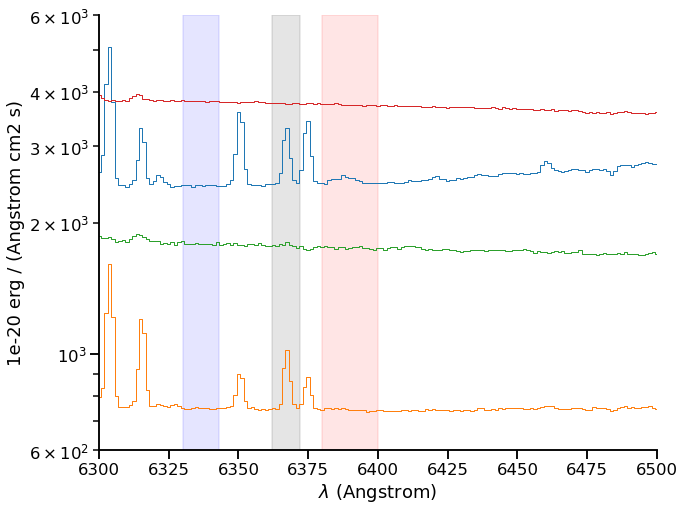

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
spec_avsub.plot()
spec_out.plot()
spec_b_avsub.plot()
spec_bb_avsub.plot()

b1, b2 = 6330, 6343
r1, r2 = 6380, 6400
w1, w2 = 6362, 6372

ax.axvspan(w1, w2, color="k", alpha=0.1)

ax.axvspan(b1, b2, color="b", alpha=0.1)
ax.axvspan(r1, r2, color="r", alpha=0.1)

ax.set(
    xlim=[6300, 6500],
    ylim=[600, 6e3],
    yscale="log",
)
sns.despine()

In [51]:
bg_b = cube2.select_lambda(b1, b2).mean(axis=0)
bg_r = cube2.select_lambda(r1, r2).mean(axis=0)
bg_6363 = 0.5 * (bg_b + bg_r)
wide_6363 = cube2.select_lambda(b1, r2) - bg_6363

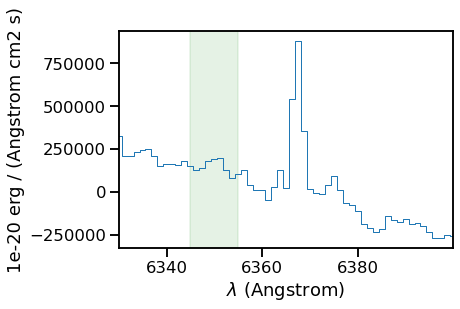

In [52]:
s1, s2 = 6345, 6355
fig, ax = plt.subplots()
wide_6363.sum(axis=(1, 2)).plot()
ax.axvspan(s1, s2, color="g", alpha=0.1)

In [53]:
sum6363 = wide_6363.select_lambda(w1, w2).sum(axis=0)
sum6347 = wide_6363.select_lambda(s1, s2).sum(axis=0)

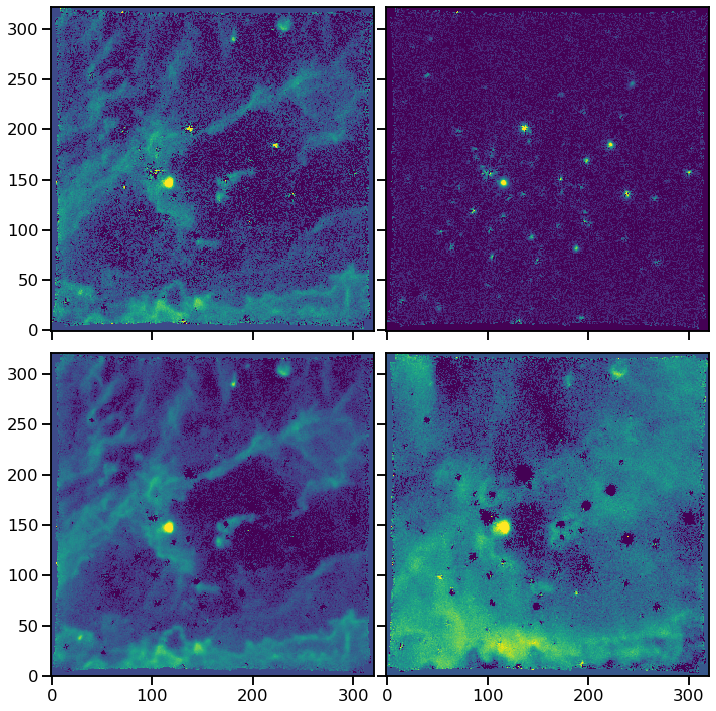

In [54]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

(50 + sum6363).plot(ax=axes[0, 0], vmin=0, vmax=1000, scale="sqrt")
(0 + sum6347).plot(ax=axes[0, 1], vmin=0, vmax=3000, scale="sqrt")
(150 + sum6300).plot(ax=axes[1, 0], vmin=0, vmax=3000, scale="sqrt")
(75 + sum6312).plot(ax=axes[1, 1], vmin=0, vmax=1000, scale="sqrt")
fig.tight_layout()